# CSE 6367 Programming Assignment 1 (P1)
## Fall 2023
## Due: 11:59pm Central Time, Friday, September 22, 2023

### Task 1 (20 points) 

Import the "colors.png" image 

<img src = "Images/colors.png" style="width:200px;height:200px">

a) Display the Red, Green and Blue color channels separately in a 1X3 plot. 

b) Apply a mask on the original image based on pixel intensity values where red pixel values are in the range (100-255) and blue and green pixel values are in the range (0-50) and show the masked image.

c) Convert the original image to grayscale using the formula, grayscale = ((Red + Green + Blue) / 3) and display the image.

d) Convert the original RGB image to the HSV color space.

In [1]:
import cv2
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import convolve
import numpy as np
from PIL import Image

#### a) Display the Red, Green and Blue color channels separately in a 1X3 plot.

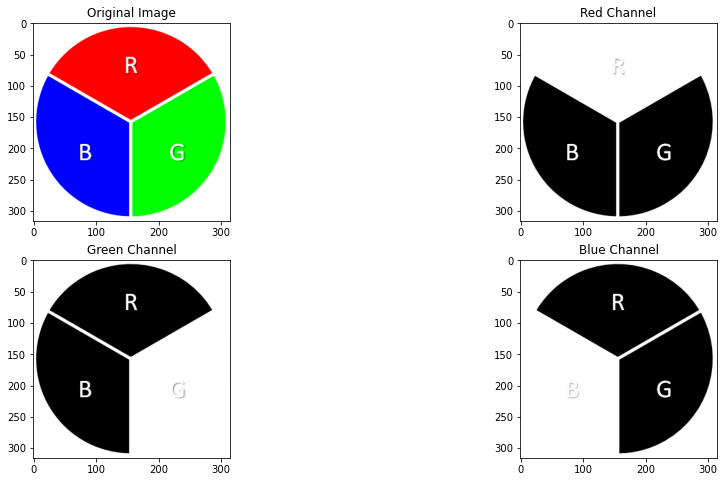

In [2]:
import matplotlib.pyplot as plt
import cv2

# Load an image (replace 'your_image.jpg' with the path to your image)
image = cv2.imread('Images/colors.png')

# Split the image into its color channels
blue_channel, green_channel, red_channel = cv2.split(image)

# plot the images
plt.figure(figsize=(16, 8))

plt.subplot(2,2,1);
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

plt.subplot(2,2,2);
plt.imshow(cv2.cvtColor(red_channel, cv2.COLOR_BGR2RGB))
plt.title('Red Channel')

plt.subplot(2,2,3);
plt.imshow(cv2.cvtColor(green_channel, cv2.COLOR_BGR2RGB))
plt.title('Green Channel')

plt.subplot(2,2,4);
plt.imshow(cv2.cvtColor(blue_channel, cv2.COLOR_BGR2RGB))
plt.title('Blue Channel')
plt.show()

#### b) Apply a mask on the original image based on pixel intensity values where red pixel values are in the range (100-255) and blue and green pixel values are in the range (0-50) and show the masked image.

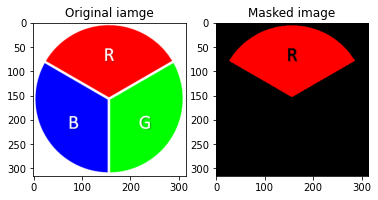

In [3]:
#import the libraries
import cv2
import numpy as np

# Load the image
image = cv2.imread('Images/colors.png')

#masking the image
lower_bound = np.array([0, 0, 100], dtype=np.uint8)
upper_bound = np.array([50,50, 255], dtype=np.uint8)
mask = cv2.inRange(image, lower_bound, upper_bound)

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Display the masked image
cv2.imshow('Masked Image', masked_image)

#plot the images
plt.subplot(1,2,1);
plt.imshow(image[:,:,::-1]);
plt.title("Original iamge");
plt.subplot(1,2,2);
plt.imshow(masked_image[:,:,::-1]);
plt.title("Masked image");
plt.show()


#### c) Convert the original image to grayscale using the formula, grayscale = ((Red + Green + Blue) / 3) and display the image.

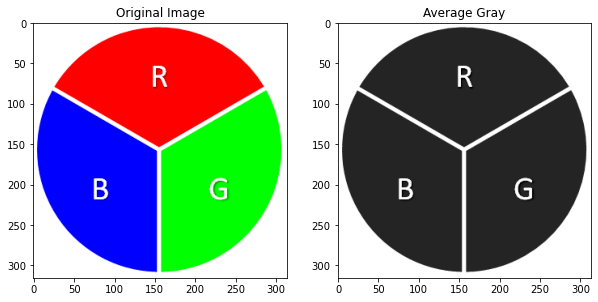

In [4]:
#import the libraries
import cv2

#load the image
original_image = cv2.imread("Images/colors.png")

#apply average grayscale
blue = original_image[:,:,0]
green = original_image[:,:,1]
red = original_image[:,:,2]
Average_Gray = blue/3+green/3+red/3

#plot the images
plt.figure(figsize=[10,5])
plt.subplot(1,2,1);
plt.imshow(original_image[:,:,::-1]);
plt.title("Original Image")

plt.subplot(1,2,2);
plt.imshow(Average_Gray, cmap = "gray");
plt.title("Average Gray");
plt.show()


#### d) Convert the original RGB image to the HSV color space.

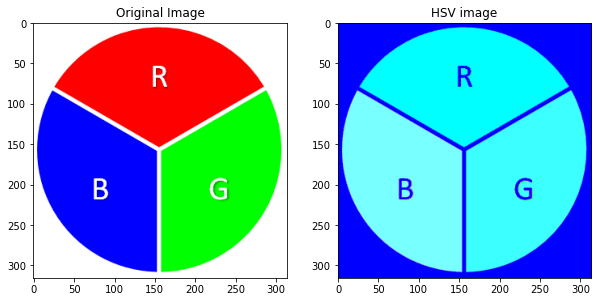

In [5]:
#import libraries
import cv2
#load the image
img = cv2.imread('Images/colors.png')
hsvImg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#plot the images
plt.figure(figsize=[10,5])
plt.subplot(1,2,1);
plt.imshow(original_image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(1,2,2);
plt.imshow(hsvImg, cmap = "gray");
plt.title("HSV image");


### Task 2 (20 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.

a) Shift the original image 50 pixels left and 50 pixels down and display the translated image.

b) Rotate the image counter-clockwise by 60 degree and display the result.

c) Flip the image vertically and horizontally and display the results in a 1X2 plot.

d) Crop the head part of the cameraman and display it. (no specific crop requirement, any reasonable crop of the head will be considered correct)

#### a) Shift the original image 50 pixels left and 50 pixels down and display the translated image.

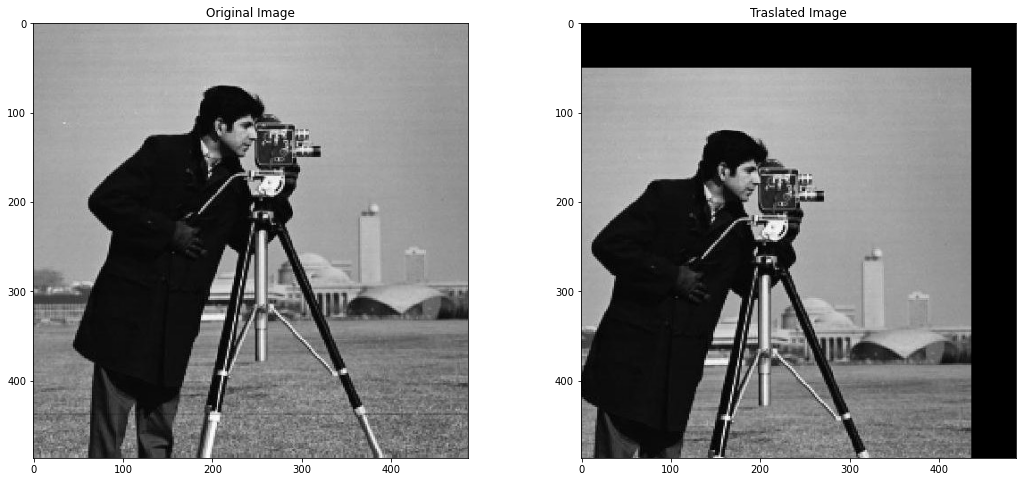

In [6]:
#Import libraries
import cv2
import numpy as np

#Load the input image
image = cv2.imread('Images/cameraman.jpeg')

#access the height and width of image
height,width, _ = image.shape

#define the translation matrix
M = np.float32([[1,0,-50],[0,1,50]])

# perform the translation
image1 = cv2.warpAffine(image,M,(width,height))

#plot the images
plt.figure(figsize=[18,8])
plt.subplot(121), plt.imshow(image), plt.title('Original Image')
plt.subplot(122), plt.imshow(image1), plt.title('Traslated Image')
plt.show()

#### b) Rotate the image counter-clockwise by 60 degree and display the result.

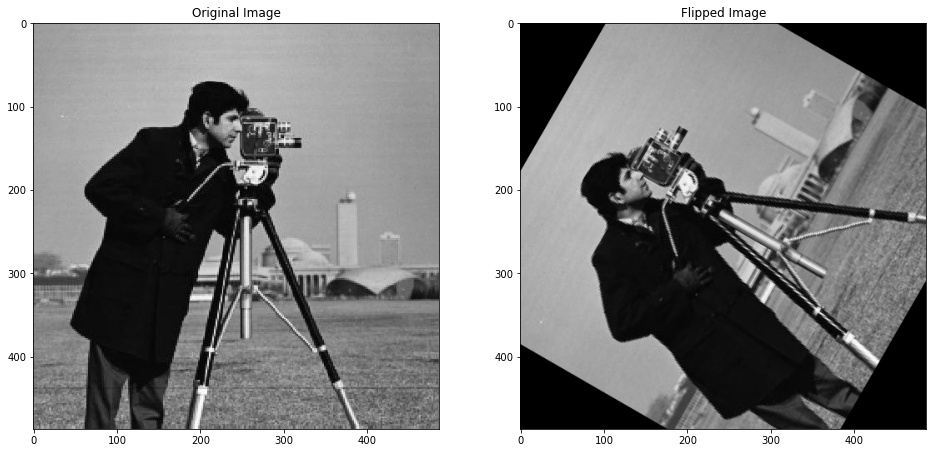

In [7]:
#import libraries
import cv2
#load the images
image = cv2.imread("Images/cameraman.jpeg")

#get the height and width of an image
height, width = image.shape[:2]
# get the center of the image
center_x, center_y = (width/2, height/2)

# rotate the image by 60 degrees counter-clockwise around the center of the image
M = cv2.getRotationMatrix2D((center_x, center_y), 60, 1.0)
rotated_image = cv2.warpAffine(image, M, (width, height))

#plot the images
plt.figure(figsize=[16,8])
plt.subplot(121), plt.imshow(image), plt.title('Original Image')
plt.subplot(122), plt.imshow(rotated_image), plt.title('Flipped Image')
plt.show()

#### c) Flip the image vertically and horizontally and display the results in a 1X2 plot.

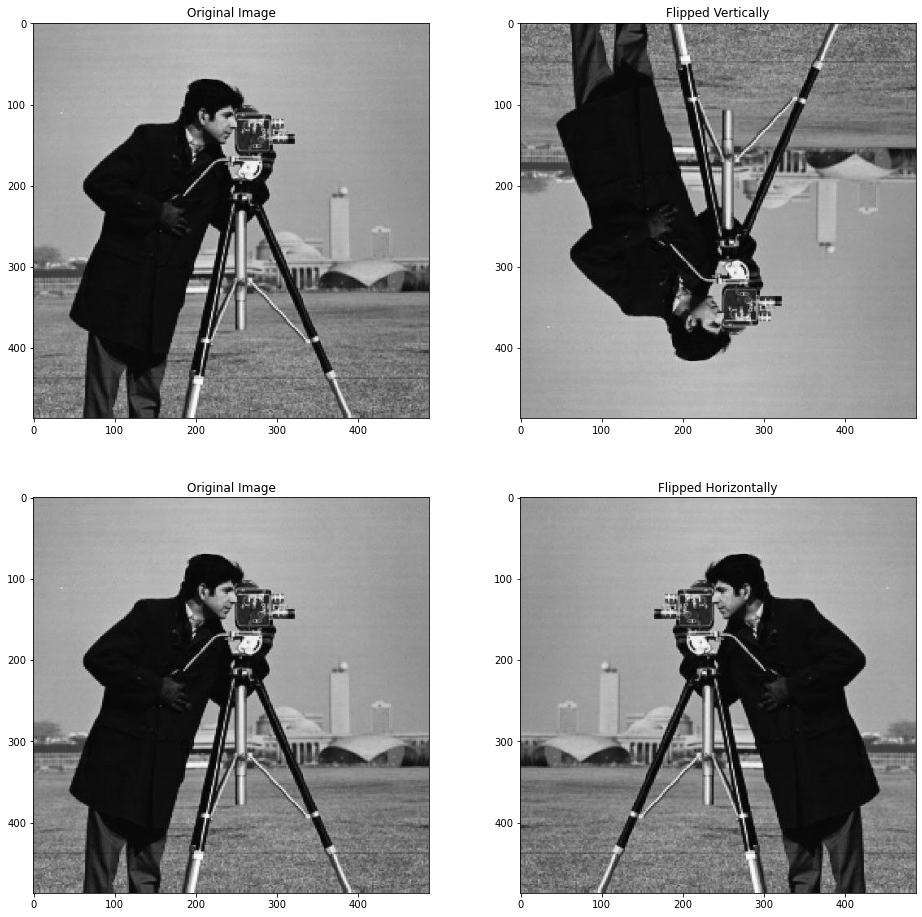

In [8]:
#import libraries
import cv2

# Load input image
image = cv2.imread('Images/cameraman.jpeg')

# flip the image by vertically and horizontally
img_vertical = cv2.flip(image, 0)
img_horizontal = cv2.flip(image, 1)

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16,16))

# Show images in each subplot
plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(2,2,2)
plt.imshow(img_vertical)
plt.title("Flipped Vertically")

plt.subplot(2,2,3)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(2,2,4)
plt.imshow(img_horizontal)
plt.title("Flipped Horizontally")
plt.show()

#### d) Crop the head part of the cameraman and display it. (no specific crop requirement, any reasonable crop of the head will be considered correct)

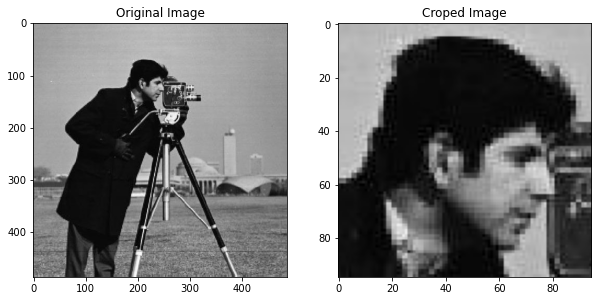

In [9]:
#import libraries
import cv2

#Load input image
image = cv2.imread('Images/cameraman.jpeg')

crop = image[65:160,170:265]

plt.figure(figsize=[10,10])
plt.subplot(121), plt.imshow(image), plt.title('Original Image')
plt.subplot(122), plt.imshow(crop), plt.title('Croped Image')
plt.show()

### Task 3 (20 points) 

Import the "cameraman.jpeg" image and

a) Perform average blur with kernel size 9X9 and 25X25. 

b) Perform gaussian blur with kernel size 9X9, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 25X25, sigma 15.0

c) Perform median blur with kernel size 5X5 and 15X15.

d) Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels, and resize the original image to 40X40 pixels. 

Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered/processed images in a 1X3 grid. 

#### a) Perform average blur with kernel size 9X9 and 25X25.



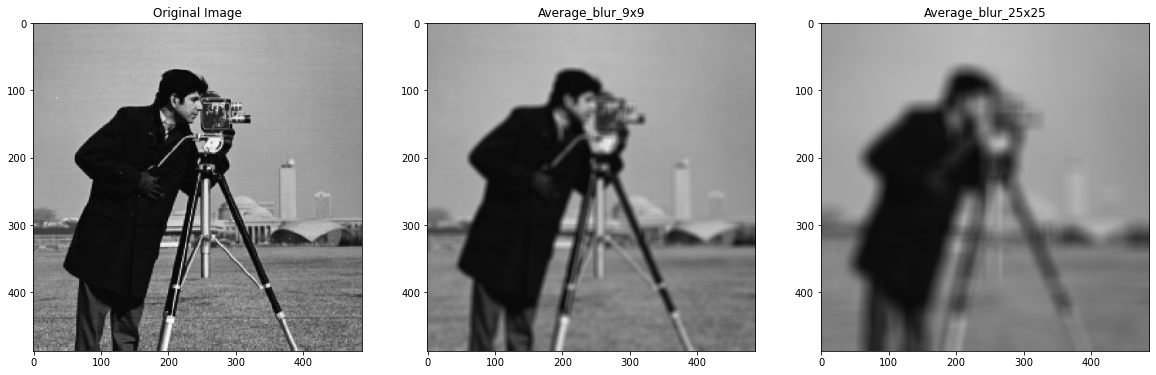

In [10]:
#import libraries
import cv2

#load the images
image = cv2.imread("Images/cameraman.jpeg")

#perform average blur with kernel size 9X9 and 25X25.

blurred_9x9 = cv2.blur(image, (9, 9))
height_diff = image.shape[0] - blurred_9x9.shape[0]
width_diff = image.shape[1] - blurred_9x9.shape[1]
top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
blur_9x9=cv2.copyMakeBorder(blurred_9x9,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))


blurred_25x25 = cv2.blur(image, (25, 25))
height_diff = image.shape[0] - blurred_25x25.shape[0]
width_diff = image.shape[1] - blurred_25x25.shape[1]
top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
blur_25x25=cv2.copyMakeBorder(blurred_25x25,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))


plt.figure(figsize=[20,8])
plt.subplot(131), plt.imshow(image), plt.title('Original Image')
plt.subplot(132), plt.imshow(blur_9x9), plt.title('Average_blur_9x9')
plt.subplot(133), plt.imshow(blur_25x25), plt.title('Average_blur_25x25')
plt.show()

#### b) Perform gaussian blur with kernel size 9X9, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 25X25, sigma 15.0



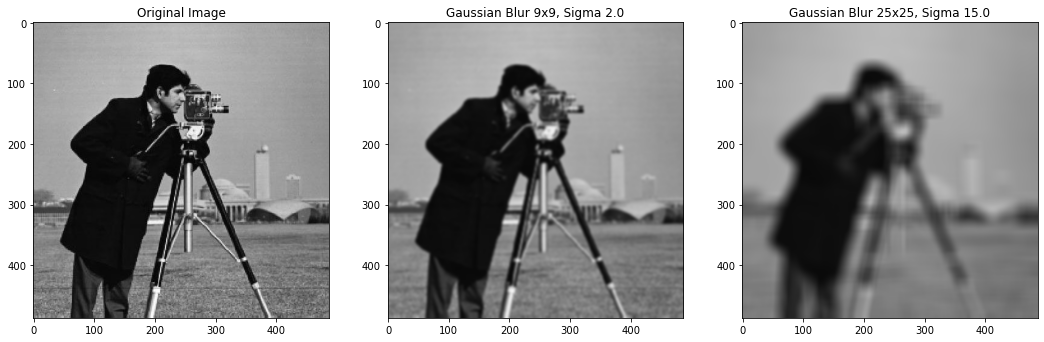

In [11]:
import cv2
import numpy as np

# Load your image
image = cv2.imread('Images/cameraman.jpeg')  # Replace 'your_image.jpg' with the path to your image

# Apply Gaussian blur with a 9x9 kernel and sigma 2.0
gaussian_blur_9x9 = cv2.GaussianBlur(image, (9, 9), 2.0)
height_diff = image.shape[0] - gaussian_blur_9x9.shape[0]
width_diff = image.shape[1] - gaussian_blur_9x9.shape[1]
top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
Gaussian_blur_9x9=cv2.copyMakeBorder(gaussian_blur_9x9,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))

# Apply Gaussian blur with a 25x25 kernel and sigma 15.0
gaussian_blur_25x25 = cv2.GaussianBlur(image, (25, 25), 15.0)
height_diff = image.shape[0] - gaussian_blur_25x25.shape[0]
width_diff = image.shape[1] - gaussian_blur_25x25.shape[1]
top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
Gaussian_blur_25x25=cv2.copyMakeBorder(gaussian_blur_25x25,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))


plt.figure(figsize=(18, 8))
plt.subplot(131), plt.imshow(image), plt.title('Original Image')
plt.subplot(132), plt.imshow(Gaussian_blur_9x9), plt.title('Gaussian Blur 9x9, Sigma 2.0')
plt.subplot(133), plt.imshow(Gaussian_blur_25x25), plt.title('Gaussian Blur 25x25, Sigma 15.0')
plt.show()


#### c) Perform median blur with kernel size 5X5 and 15X15.

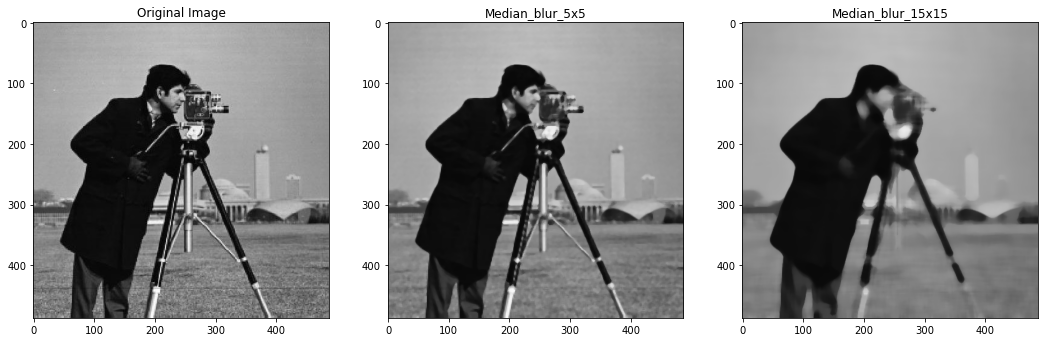

In [12]:
import cv2
import numpy as np

# Load your image
image = cv2.imread('Images/cameraman.jpeg')  # Replace 'your_image.jpg' with the path to your image

# Apply Median blur with a 5x5 kernel and zero padding
median_blur_5x5 = cv2.medianBlur(image, 5)
height_diff = image.shape[0] - median_blur_5x5.shape[0]
width_diff = image.shape[1] - median_blur_5x5.shape[1]
top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
Median_blur_5x5=cv2.copyMakeBorder(median_blur_5x5,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))

# Apply Median blur with a 15x15 kernel and zero padding
median_blur_15x15 = cv2.medianBlur(image, 15)
height_diff = image.shape[0] -median_blur_15x15.shape[0]
width_diff = image.shape[1] - median_blur_15x15.shape[1]
top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
Median_blur_15x15=cv2.copyMakeBorder(median_blur_15x15,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))

plt.figure(figsize=(18, 8))
plt.subplot(131), plt.imshow(image), plt.title('Original Image')
plt.subplot(132), plt.imshow(Median_blur_5x5), plt.title('Median_blur_5x5')
plt.subplot(133), plt.imshow(Median_blur_15x15), plt.title('Median_blur_15x15')
plt.show()



#### d) Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels, and resize the original image to 40X40 pixels.

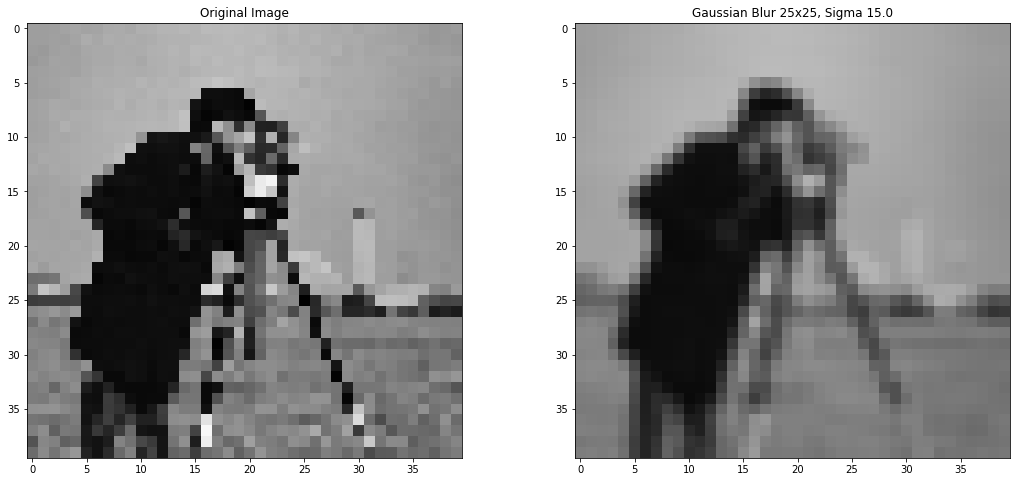

In [13]:
#import libraries
import cv2
import numpy as np

#Load the original image
image = cv2.imread('Images/cameraman.jpeg')  

gaussian_blur_25x25 = cv2.GaussianBlur(image, (25, 25), 15.0)

#apply zero padding
height_diff = image.shape[0] - gaussian_blur_25x25.shape[0]
width_diff = image.shape[1] - gaussian_blur_25x25.shape[1]
top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
gaussian_blur=cv2.copyMakeBorder(gaussian_blur_25x25,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))

# Resize the original image to 40x40 pixels
target_size = (40, 40)
resized_original_image = cv2.resize(image, target_size)

# Resize the blurred image to 40x40 pixels
resized_blurred_image = cv2.resize(gaussian_blur, target_size)


plt.figure(figsize=(18, 8))
plt.subplot(121), plt.imshow(resized_original_image), plt.title('Original Image')

plt.subplot(122), plt.imshow(resized_blurred_image), plt.title('Gaussian Blur 25x25, Sigma 15.0')
plt.show()


### Task 4 (20 points)

Import the "cameraman.jpeg" image and apply

a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

c) Laplacian edge detector 

d) Edge detection using difference of Gaussians (DoG)
    
Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 1X2 plot. 

#### a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

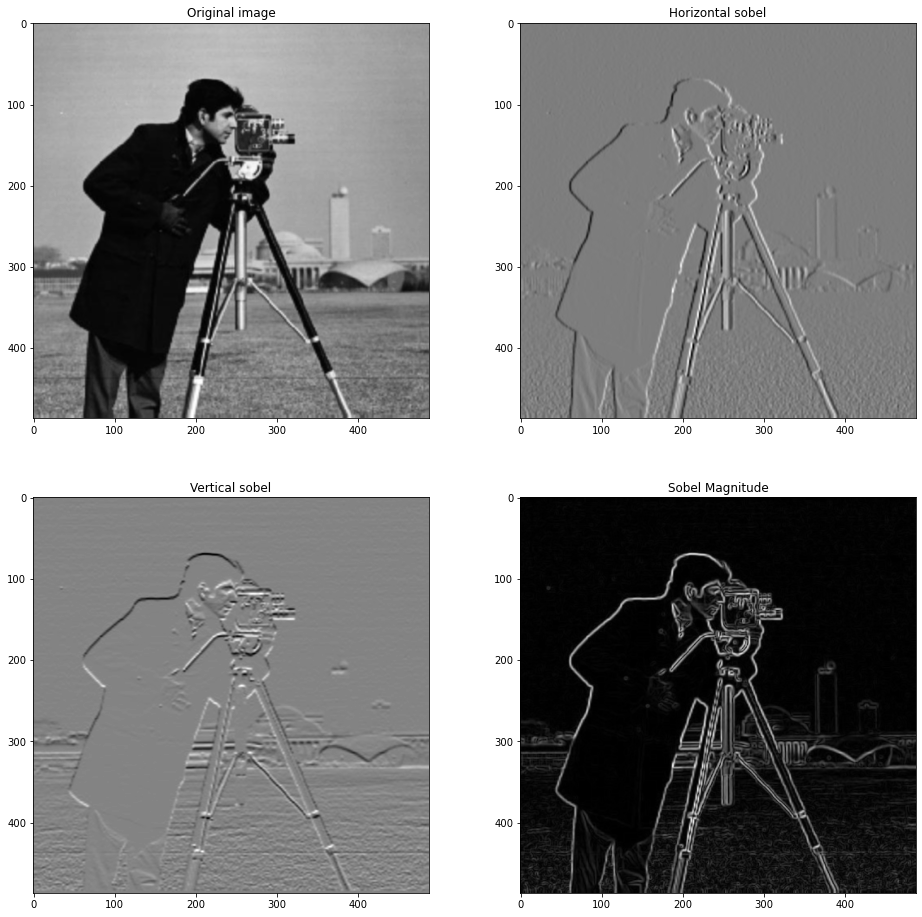

In [14]:
#import the libraries
import cv2
import numpy as np

#load the image
original_img = cv2.imread('Images/cameraman.jpeg')
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

#apply gaussian blur for removing the noise
image= cv2.GaussianBlur(gray,(3,3),0)


#apply zero padding
height_diff = original_img.shape[0] - image.shape[0]
width_diff = original_img.shape[1] - image.shape[1]
top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
image=cv2.copyMakeBorder(image,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))

#Calculate sobel horizontal, vertical and magnitude image
sobel_x = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
sobel_magnitude = np.sqrt((sobel_x)**2 + (sobel_y)**2)

#plot the images
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(image,cmap=plt.cm.gray)
plt.title("Original image")

plt.subplot(2,2,2)
plt.imshow(sobel_x,cmap=plt.cm.gray)
plt.title("Horizontal sobel")

plt.subplot(2,2,3)
plt.imshow(sobel_y,cmap=plt.cm.gray)
plt.title("Vertical sobel")

plt.subplot(2,2,4)
plt.imshow(sobel_magnitude,cmap=plt.cm.gray)
plt.title("Sobel Magnitude")
plt.show()

#### b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

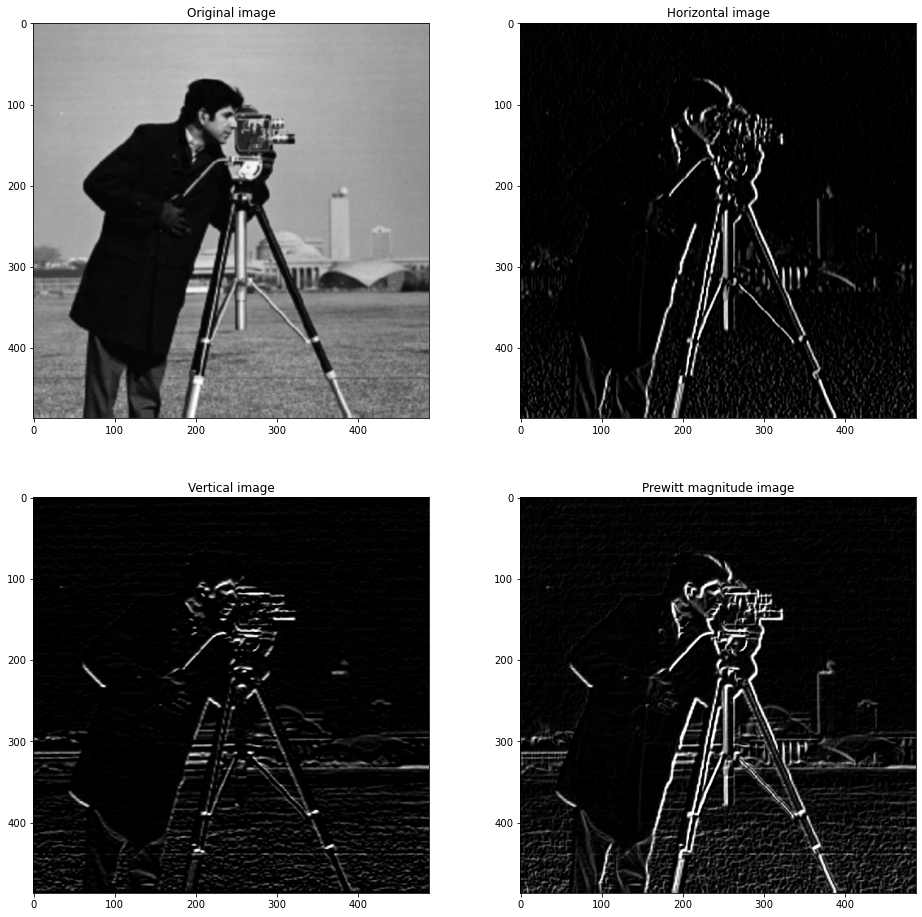

In [15]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

#load the images
original_img = cv2.imread('Images/cameraman.jpeg')
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

#apply gaussian blur for removing the noise
image= cv2.GaussianBlur(gray,(3,3),0)

#Find the gradient of an iamge
kernelx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernely = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
horizontal=cv2.filter2D(image,-1,kernelx)
vertical=cv2.filter2D(image,-1,kernely)

#find the magnitude of an image
magnitude = cv2.addWeighted(horizontal, 1, vertical, 1, 0)

# Apply zero padding
height_diff = original_img.shape[0] - image.shape[0]
width_diff = original_img.shape[1] - image.shape[1]

top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
padded_horizontal = cv2.copyMakeBorder(horizontal,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0)) 
padded_vertical = cv2.copyMakeBorder(vertical,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))
padded_magnitude = cv2.copyMakeBorder(magnitude,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0))


#plot the images
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16,16))
plt.subplot(2,2,1)
plt.imshow(image,cmap=plt.cm.gray)
plt.title("Original image")

plt.subplot(2,2,2)
plt.imshow(padded_horizontal,cmap=plt.cm.gray)
plt.title("Horizontal image")
  
plt.subplot(2,2,3)
plt.imshow(padded_vertical,cmap=plt.cm.gray)
plt.title("Vertical image")
 
plt.subplot(2,2,4)
plt.imshow(padded_magnitude,cmap=plt.cm.gray)
plt.title("Prewitt magnitude image")
plt.show()


#### c)Laplacian edge detector

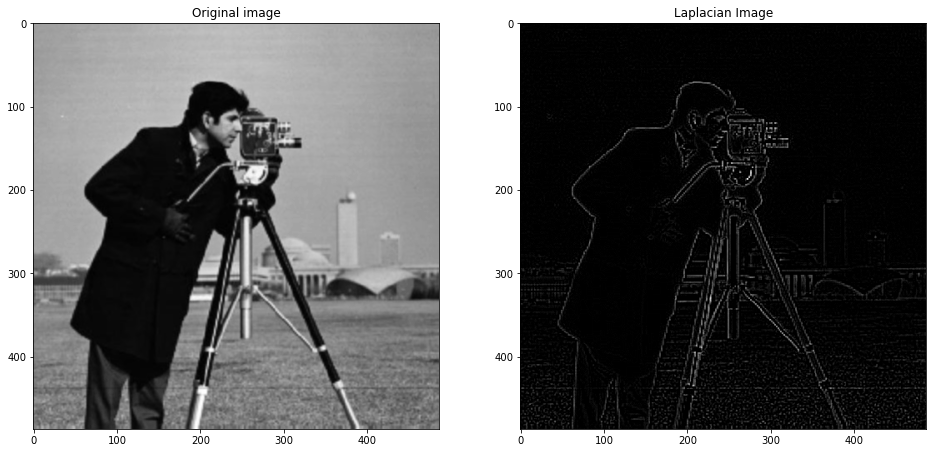

In [16]:
#import the libraries
import cv2
import numpy as np

#Load the image
original_img = cv2.imread('Images/cameraman.jpeg')
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

#apply gaussian blur for removing the noise
image= cv2.GaussianBlur(gray,(3,3),0)

#apply laplacian function
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
laplacian_edges = cv2.filter2D(image, -1, laplacian_kernel)

#apply zero padding
height_diff = original_img.shape[0] - image.shape[0]
width_diff = original_img.shape[1] - image.shape[1]

top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
Laplacian = cv2.copyMakeBorder(laplacian_edges,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0)) 

#plot the images
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(image,cmap=plt.cm.gray)
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(Laplacian,cmap=plt.cm.gray)
plt.title("Laplacian Image")
plt.show()

#### d) Edge detection using difference of Gaussians (DoG)

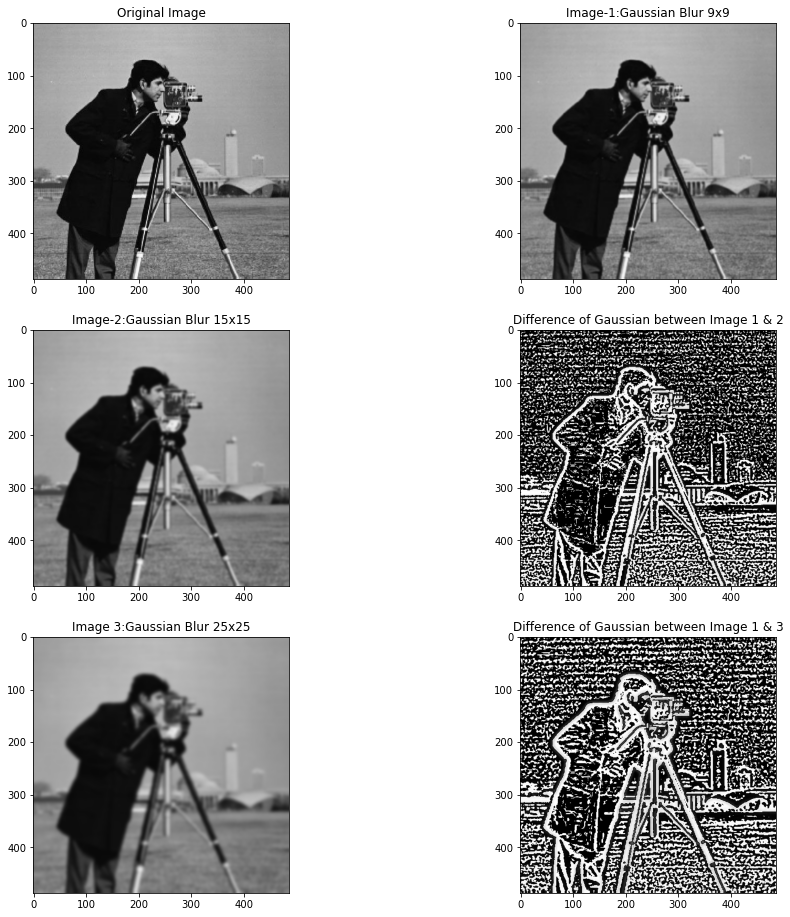

In [17]:
#import the libraries
import cv2
import numpy as np

# Load your image
image = cv2.imread('Images/cameraman.jpeg')  

# Apply Gaussian blur with a 9x9 kernel and sigma 1.0
gaussian_blur_9x9 = cv2.GaussianBlur(image, (9, 9), 1.0)


# Apply Gaussian blur with a 15x15 kernel and sigma 2.0
gaussian_blur_15x15 = cv2.GaussianBlur(image, (15, 15), 2.0)

# Apply Gaussian blur with a 25x25 kernel and sigma 3.0
gaussian_blur_25x25 = cv2.GaussianBlur(image, (25, 25), 3.0)

#apply zero padding
height_diff = image.shape[0] - blurred_9x9.shape[0]
width_diff = image.shape[1] - blurred_9x9.shape[1]

top_pad,bottom_pad,left_pad,right_pad = height_diff,height_diff,width_diff,width_diff
padded_gaussian_blur_9x9 = cv2.copyMakeBorder(gaussian_blur_9x9,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0)) 
padded_gaussian_blur_15x15= cv2.copyMakeBorder(gaussian_blur_15x15,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0)) 
padded_gaussian_blur_25x25 = cv2.copyMakeBorder(gaussian_blur_25x25,top_pad,bottom_pad,left_pad,right_pad,cv2.BORDER_CONSTANT,value=(0,0,0)) 


#Calculate the difference of gaussian between gaussian_blur_9x9 and gaussian_blur_15x15
dog1= gaussian_blur_9x9-gaussian_blur_15x15

#Calculate the difference of gaussian between gaussian_blur_9x9 and gaussian_blur_25x25
dog2=gaussian_blur_9x9-gaussian_blur_25x25

#plot the images
plt.figure(figsize=(16, 16))
plt.subplot(321), plt.imshow(image), plt.title('Original Image')
plt.subplot(322), plt.imshow(padded_gaussian_blur_9x9), plt.title('Image-1:Gaussian Blur 9x9')
plt.subplot(323), plt.imshow(padded_gaussian_blur_15x15), plt.title('Image-2:Gaussian Blur 15x15')
plt.subplot(324), plt.imshow(dog1), plt.title('Difference of Gaussian between Image 1 & 2')
plt.subplot(325), plt.imshow(padded_gaussian_blur_25x25), plt.title('Image 3:Gaussian Blur 25x25')
plt.subplot(326), plt.imshow(dog2), plt.title('Difference of Gaussian between Image 1 & 3')
plt.show()



### Task 5 (20 points)

The Canny edge detector is an edge detection algorithm with multiple steps. The steps in the Canny edge detector are listed below: 

    - Smooth the image to remove the noise (Gaussian filter)
    - Find the gradients of the image
    - Apply non-maximum suppression
    - Apply double threshold. Select edge pixels by hysteresis (suppress all edges that are weak and not connected to strong edges).

Implement "Canny Edge Detector" from scratch using the steps above (for each step above, you can use library functions) and compare your result with OpenCV implementation of "Canny Edge Detector" (https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

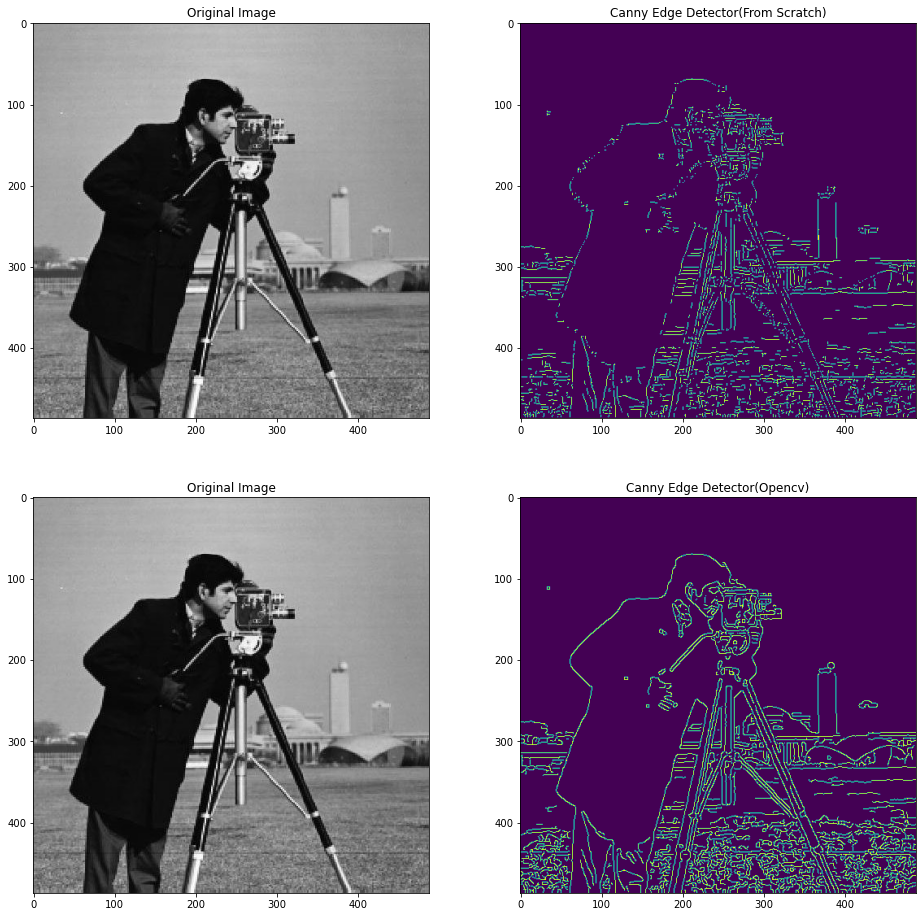

In [18]:
#Implement "Canny Edge Detector" from scratch using the steps
#import the libraries
import cv2
import numpy as np
original_img = cv2.imread('Images/cameraman.jpeg')

#covert original image to grayscale image
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

#1.Smooth the image to remove the noise (Gaussian filter)
image= cv2.GaussianBlur(gray,(5,5),1.4)

#canny_edge detection from scratch
def canny_edge_detection(image,high):
    
    #2.Find the gradients of the image
    gradient_x = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
    gradient_y = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)

    #3. Calculate the edge magnitude and direction
    Edge_magnitude = np.sqrt((gradient_x)**2 + (gradient_y)**2)
    angle_direction = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

    
    #3. Apply non-maximum suppression
    height, width = Edge_magnitude.shape
    suppressed = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            angle = angle_direction[i, j]
            # Convert negative angles to positive
            if angle < 0:
                angle += 180
            # Determine the two neighboring pixels along the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbor1 = Edge_magnitude[i, j + 1]
                neighbor2 = Edge_magnitude[i, j - 1]
            elif 22.5 <= angle < 67.5:
                neighbor1 = Edge_magnitude[i + 1, j - 1]
                neighbor2 = Edge_magnitude[i - 1, j + 1]
            elif 67.5 <= angle < 112.5:
                neighbor1 = Edge_magnitude[i + 1, j]
                neighbor2 = Edge_magnitude[i - 1, j]
            elif 112.5 <= angle < 157.5:
                neighbor1 = Edge_magnitude[i - 1, j - 1]
                neighbor2 = Edge_magnitude[i + 1, j + 1]

            # Compare the current pixel's magnitude with its neighbors
            if Edge_magnitude[i, j] >= neighbor1 and Edge_magnitude[i, j] >= neighbor2:
                suppressed[i, j] = Edge_magnitude[i, j]

                
    # 4. Apply double threshold. Select edge pixels by hysteresis
    
    # THRESHOLD
    highThreshold =high * 0.2
    lowThreshold = highThreshold * 0.5

    
    M, N = suppressed.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i, strong_j = np.where(suppressed >= highThreshold)
    zeros_i, zeros_j = np.where(suppressed < lowThreshold)

    weak_i, weak_j = np.where((suppressed <= highThreshold) & (suppressed >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    # HYSTERESIS

    for i in range(1, M-1):
        for j in range(1, N-1):
            if (res[i, j] == weak):
                if (
                    (res[i+1, j-1] == strong) or (res[i+1, j] == strong) or
                    (res[i+1, j+1] == strong) or (res[i, j-1] == strong) or
                    (res[i, j+1] == strong) or (res[i-1, j-1] == strong) or
                    (res[i-1, j] == strong) or (res[i-1, j+1] == strong)
                ):
                    res[i, j] = strong
                else:
                    res[i, j] = 0
    return res

#here is apply high threshold=255*0.2 and low threshold= high threshold* 0.5, we can easily change this value
#plotting the original image and edge detected(using canny_edge_detection function)image
plt.figure(figsize=(16, 16))
plt.subplot(221), plt.imshow(original_img), plt.title('Original Image')
plt.subplot(222), plt.imshow(canny_edge_detection(image,255)), plt.title('Canny Edge Detector(From Scratch)')


#using OpenCV implementation of "Canny Edge Detector"
edges = cv2.Canny(image, threshold1=25.5, threshold2=51, apertureSize=3, L2gradient=True)

#plotting the original image and edge detected(using Opencv canny function)image
plt.subplot(223), plt.imshow(original_img), plt.title('Original Image')
plt.subplot(224), plt.imshow(edges), plt.title('Canny Edge Detector(Opencv)')
plt.show()



## Submission Guidelines:

1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)

2. Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.

3. You don't need to attach the image file with your submission.
